In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#np.set_printoptions(threshold=sys.maxsize)

2022-12-06 00:13:49.474452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 00:13:49.572248: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-06 00:13:49.596025: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-06 00:13:50.026494: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'edge_detection_with_prior'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
Model = model.Model(config_path)
DataProcessing = dataset.DataProcessing(Model.cfg["INPUT_SHAPE"], Model.cfg["OUTPUT_SHAPE"], config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

2022-12-06 00:13:51.104430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 00:13:51.107883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 00:13:51.107980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-06 00:13:51.108518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Load Dataset, Preprocess Images and Dataset

The TRAIN DS contains 1500 images.
The TEST DS contains 247 images.
The IMG_ONLY DS contains 80 images.


2022-12-06 00:14:02.470408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1241 of 1500
2022-12-06 00:14:04.674582: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


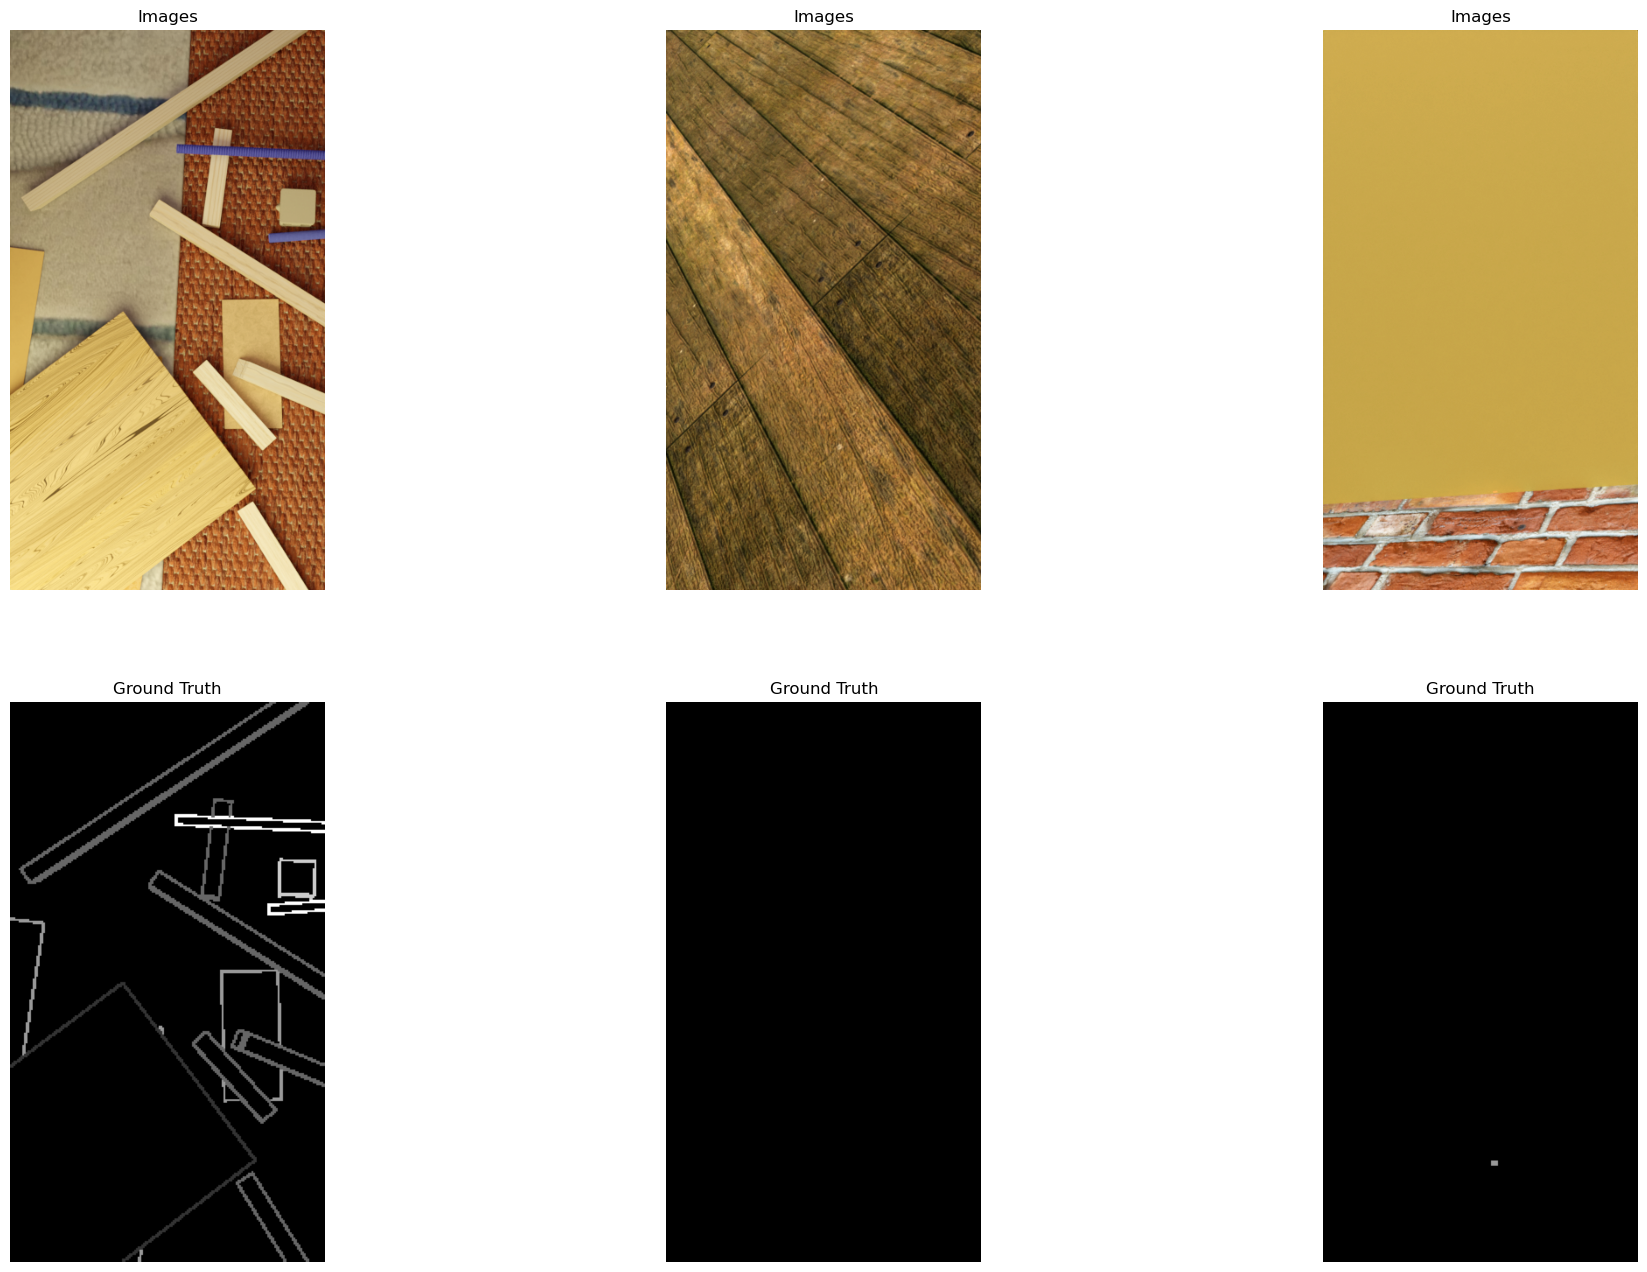

In [3]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

img_only_ds, img_count_img_only_ds = DataProcessing.load_dataset(DataProcessing.key.img_only)

if Model.train_model:
    for inp, out in train_ds.take(1):
        edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                                        batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                        num_classes=DataProcessing.num_classes['edge'])

# Define, Compile and Train Model

In [4]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.num_classes['edge'])
    # model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(),
                  metrics=Model.get_metrics(DataProcessing.num_classes['edge']))

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=train_ds,
                        callbacks=Model.get_callbacks(), verbose=1)

model = Model.get_best_model_from_checkpoints()

(640, 360, 3)
Epoch 1/60


2022-12-06 00:14:11.172290: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-06 00:14:12.303408: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


500/500 [==============================] - 62s 113ms/step - loss: 187.8194 - out_edge_loss: 187.8194 - accuracy: 0.9735 - accuracy_1: 0.9813 - accuracy_2: 0.9759 - accuracy_3: 0.9510 - accuracy_4: 0.9863 - accuracy_5: 0.9729 - f1: 0.0224 - precision: 0.0281 - recall: 0.0287 - f1_1: 0.0077 - precision_1: 0.0071 - recall_1: 0.0158 - f1_2: 0.0287 - precision_2: 0.0959 - recall_2: 0.0176 - f1_3: 0.0213 - precision_3: 0.0162 - recall_3: 0.0660 - f1_4: 0.0067 - precision_4: 0.0053 - recall_4: 0.0188 - f1_5: 0.0063 - precision_5: 0.0043 - recall_5: 0.0290 - val_loss: 139.9780 - val_out_edge_loss: 139.9780 - val_accuracy: 0.9884 - val_accuracy_1: 0.9952 - val_accuracy_2: 0.9619 - val_accuracy_3: 0.9908 - val_accuracy_4: 0.9972 - val_accuracy_5: 0.9967 - val_f1: 0.3620 - val_precision: 0.3506 - val_recall: 0.3741 - val_f1_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_2: 0.4641 - val_precision_2: 0.3506 - val_recall_2: 0.6860 - val_f1_3: 0.0000e+00 - val_precisi

Epoch 8/60
500/500 [==============================] - 59s 118ms/step - loss: 79.3028 - out_edge_loss: 79.3028 - accuracy: 0.9927 - accuracy_1: 0.9946 - accuracy_2: 0.9834 - accuracy_3: 0.9911 - accuracy_4: 0.9972 - accuracy_5: 0.9974 - f1: 0.6035 - precision: 0.6001 - recall: 0.6070 - f1_1: 0.1139 - precision_1: 0.3423 - recall_1: 0.0692 - f1_2: 0.6812 - precision_2: 0.6425 - recall_2: 0.7250 - f1_3: 0.5632 - precision_3: 0.5395 - recall_3: 0.5894 - f1_4: 0.4663 - precision_4: 0.5062 - recall_4: 0.4333 - f1_5: 0.6601 - precision_5: 0.5863 - recall_5: 0.7555 - val_loss: 92.8518 - val_out_edge_loss: 92.8518 - val_accuracy: 0.9911 - val_accuracy_1: 0.9930 - val_accuracy_2: 0.9840 - val_accuracy_3: 0.9838 - val_accuracy_4: 0.9973 - val_accuracy_5: 0.9973 - val_f1: 0.5518 - val_precision: 0.4954 - val_recall: 0.6226 - val_f1_1: 0.2363 - val_precision_1: 0.2473 - val_recall_1: 0.2263 - val_f1_2: 0.6711 - val_precision_2: 0.6624 - val_recall_2: 0.6800 - val_f1_3: 0.4713 - val_precision_3: 0.3

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=83.00-epoch=10.00-f1=0.5861/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=83.00-epoch=10.00-f1=0.5861/assets


500/500 [==============================] - 64s 129ms/step - loss: 73.1860 - out_edge_loss: 73.1860 - accuracy: 0.9932 - accuracy_1: 0.9943 - accuracy_2: 0.9847 - accuracy_3: 0.9922 - accuracy_4: 0.9973 - accuracy_5: 0.9974 - f1: 0.6265 - precision: 0.6076 - recall: 0.6468 - f1_1: 0.3222 - precision_1: 0.4157 - recall_1: 0.2642 - f1_2: 0.7009 - precision_2: 0.6625 - recall_2: 0.7448 - f1_3: 0.5808 - precision_3: 0.5525 - recall_3: 0.6129 - f1_4: 0.4824 - precision_4: 0.5042 - recall_4: 0.4634 - f1_5: 0.6690 - precision_5: 0.5955 - recall_5: 0.7633 - val_loss: 83.0000 - val_out_edge_loss: 83.0000 - val_accuracy: 0.9928 - val_accuracy_1: 0.9957 - val_accuracy_2: 0.9852 - val_accuracy_3: 0.9937 - val_accuracy_4: 0.9912 - val_accuracy_5: 0.9980 - val_f1: 0.5861 - val_precision: 0.5924 - val_recall: 0.5800 - val_f1_1: 0.3193 - val_precision_1: 0.6669 - val_recall_1: 0.2099 - val_f1_2: 0.6871 - val_precision_2: 0.7019 - val_recall_2: 0.6730 - val_f1_3: 0.5587 - val_precision_3: 0.7900 - val_r

500/500 [==============================] - 54s 108ms/step - loss: 62.9496 - out_edge_loss: 62.9496 - accuracy: 0.9940 - accuracy_1: 0.9953 - accuracy_2: 0.9862 - accuracy_3: 0.9934 - accuracy_4: 0.9975 - accuracy_5: 0.9978 - f1: 0.6733 - precision: 0.6449 - recall: 0.7045 - f1_1: 0.5080 - precision_1: 0.4976 - recall_1: 0.5194 - f1_2: 0.7230 - precision_2: 0.6906 - recall_2: 0.7591 - f1_3: 0.6596 - precision_3: 0.6332 - recall_3: 0.6891 - f1_4: 0.5224 - precision_4: 0.5414 - recall_4: 0.5093 - f1_5: 0.6928 - precision_5: 0.6247 - recall_5: 0.7785 - val_loss: 65.2702 - val_out_edge_loss: 65.2702 - val_accuracy: 0.9947 - val_accuracy_1: 0.9961 - val_accuracy_2: 0.9874 - val_accuracy_3: 0.9942 - val_accuracy_4: 0.9977 - val_accuracy_5: 0.9981 - val_f1: 0.6866 - val_precision: 0.7180 - val_recall: 0.6579 - val_f1_1: 0.4454 - val_precision_1: 0.6870 - val_recall_1: 0.3296 - val_f1_2: 0.7379 - val_precision_2: 0.7420 - val_recall_2: 0.7339 - val_f1_3: 0.6682 - val_precision_3: 0.7011 - val_r

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=67.49-epoch=20.00-f1=0.6717/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=67.49-epoch=20.00-f1=0.6717/assets


500/500 [==============================] - 64s 129ms/step - loss: 61.7173 - out_edge_loss: 61.7173 - accuracy: 0.9942 - accuracy_1: 0.9952 - accuracy_2: 0.9865 - accuracy_3: 0.9937 - accuracy_4: 0.9975 - accuracy_5: 0.9979 - f1: 0.6858 - precision: 0.6518 - recall: 0.7235 - f1_1: 0.5235 - precision_1: 0.5016 - recall_1: 0.5477 - f1_2: 0.7341 - precision_2: 0.6995 - recall_2: 0.7724 - f1_3: 0.6663 - precision_3: 0.6321 - recall_3: 0.7046 - f1_4: 0.5431 - precision_4: 0.5364 - recall_4: 0.5508 - f1_5: 0.7259 - precision_5: 0.6584 - recall_5: 0.8090 - val_loss: 67.4943 - val_out_edge_loss: 67.4943 - val_accuracy: 0.9944 - val_accuracy_1: 0.9938 - val_accuracy_2: 0.9882 - val_accuracy_3: 0.9939 - val_accuracy_4: 0.9979 - val_accuracy_5: 0.9982 - val_f1: 0.6717 - val_precision: 0.6975 - val_recall: 0.6477 - val_f1_1: 0.5042 - val_precision_1: 0.4102 - val_recall_1: 0.6541 - val_f1_2: 0.7214 - val_precision_2: 0.8338 - val_recall_2: 0.6357 - val_f1_3: 0.6866 - val_precision_3: 0.6531 - val_r

500/500 [==============================] - 54s 107ms/step - loss: 56.8795 - out_edge_loss: 56.8795 - accuracy: 0.9946 - accuracy_1: 0.9960 - accuracy_2: 0.9876 - accuracy_3: 0.9942 - accuracy_4: 0.9973 - accuracy_5: 0.9980 - f1: 0.7035 - precision: 0.6698 - recall: 0.7409 - f1_1: 0.5722 - precision_1: 0.5618 - recall_1: 0.5841 - f1_2: 0.7502 - precision_2: 0.7139 - recall_2: 0.7906 - f1_3: 0.6877 - precision_3: 0.6571 - recall_3: 0.7213 - f1_4: 0.5503 - precision_4: 0.5213 - recall_4: 0.5831 - f1_5: 0.7224 - precision_5: 0.6604 - recall_5: 0.7976 - val_loss: 65.7535 - val_out_edge_loss: 65.7535 - val_accuracy: 0.9941 - val_accuracy_1: 0.9964 - val_accuracy_2: 0.9874 - val_accuracy_3: 0.9937 - val_accuracy_4: 0.9949 - val_accuracy_5: 0.9983 - val_f1: 0.6824 - val_precision: 0.6535 - val_recall: 0.7141 - val_f1_1: 0.5531 - val_precision_1: 0.6965 - val_recall_1: 0.4586 - val_f1_2: 0.7418 - val_precision_2: 0.7320 - val_recall_2: 0.7518 - val_f1_3: 0.6763 - val_precision_3: 0.6377 - val_r

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=60.70-epoch=30.00-f1=0.7044/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=60.70-epoch=30.00-f1=0.7044/assets


500/500 [==============================] - 64s 129ms/step - loss: 55.8571 - out_edge_loss: 55.8571 - accuracy: 0.9947 - accuracy_1: 0.9960 - accuracy_2: 0.9876 - accuracy_3: 0.9944 - accuracy_4: 0.9974 - accuracy_5: 0.9982 - f1: 0.7176 - precision: 0.6780 - recall: 0.7622 - f1_1: 0.5855 - precision_1: 0.5575 - recall_1: 0.6177 - f1_2: 0.7597 - precision_2: 0.7202 - recall_2: 0.8039 - f1_3: 0.7047 - precision_3: 0.6706 - recall_3: 0.7425 - f1_4: 0.5775 - precision_4: 0.5369 - recall_4: 0.6262 - f1_5: 0.7482 - precision_5: 0.6827 - recall_5: 0.8277 - val_loss: 60.7037 - val_out_edge_loss: 60.7037 - val_accuracy: 0.9952 - val_accuracy_1: 0.9965 - val_accuracy_2: 0.9887 - val_accuracy_3: 0.9948 - val_accuracy_4: 0.9978 - val_accuracy_5: 0.9983 - val_f1: 0.7044 - val_precision: 0.7754 - val_recall: 0.6453 - val_f1_1: 0.5688 - val_precision_1: 0.6982 - val_recall_1: 0.4799 - val_f1_2: 0.7464 - val_precision_2: 0.8113 - val_recall_2: 0.6911 - val_f1_3: 0.6952 - val_precision_3: 0.7460 - val_r

500/500 [==============================] - 54s 107ms/step - loss: 53.8174 - out_edge_loss: 53.8174 - accuracy: 0.9948 - accuracy_1: 0.9961 - accuracy_2: 0.9881 - accuracy_3: 0.9945 - accuracy_4: 0.9974 - accuracy_5: 0.9980 - f1: 0.7176 - precision: 0.6772 - recall: 0.7632 - f1_1: 0.5973 - precision_1: 0.5798 - recall_1: 0.6162 - f1_2: 0.7616 - precision_2: 0.7201 - recall_2: 0.8084 - f1_3: 0.7019 - precision_3: 0.6673 - recall_3: 0.7404 - f1_4: 0.5666 - precision_4: 0.5220 - recall_4: 0.6201 - f1_5: 0.7385 - precision_5: 0.6674 - recall_5: 0.8274 - val_loss: 61.9639 - val_out_edge_loss: 61.9639 - val_accuracy: 0.9951 - val_accuracy_1: 0.9961 - val_accuracy_2: 0.9890 - val_accuracy_3: 0.9945 - val_accuracy_4: 0.9978 - val_accuracy_5: 0.9983 - val_f1: 0.6967 - val_precision: 0.7769 - val_recall: 0.6315 - val_f1_1: 0.5729 - val_precision_1: 0.6084 - val_recall_1: 0.5413 - val_f1_2: 0.7654 - val_precision_2: 0.7837 - val_recall_2: 0.7479 - val_f1_3: 0.6056 - val_precision_3: 0.8825 - val_r

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=52.52-epoch=40.00-f1=0.7150/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=52.52-epoch=40.00-f1=0.7150/assets


500/500 [==============================] - 65s 130ms/step - loss: 52.2682 - out_edge_loss: 52.2682 - accuracy: 0.9949 - accuracy_1: 0.9960 - accuracy_2: 0.9880 - accuracy_3: 0.9947 - accuracy_4: 0.9975 - accuracy_5: 0.9982 - f1: 0.7273 - precision: 0.6886 - recall: 0.7705 - f1_1: 0.6039 - precision_1: 0.5826 - recall_1: 0.6285 - f1_2: 0.7655 - precision_2: 0.7282 - recall_2: 0.8069 - f1_3: 0.7204 - precision_3: 0.6863 - recall_3: 0.7581 - f1_4: 0.5982 - precision_4: 0.5474 - recall_4: 0.6609 - f1_5: 0.7554 - precision_5: 0.6895 - recall_5: 0.8356 - val_loss: 52.5195 - val_out_edge_loss: 52.5195 - val_accuracy: 0.9943 - val_accuracy_1: 0.9962 - val_accuracy_2: 0.9860 - val_accuracy_3: 0.9933 - val_accuracy_4: 0.9980 - val_accuracy_5: 0.9982 - val_f1: 0.7150 - val_precision: 0.6436 - val_recall: 0.8041 - val_f1_1: 0.6198 - val_precision_1: 0.5951 - val_recall_1: 0.6466 - val_f1_2: 0.7471 - val_precision_2: 0.6594 - val_recall_2: 0.8618 - val_f1_3: 0.6932 - val_precision_3: 0.6004 - val_r

500/500 [==============================] - 54s 107ms/step - loss: 50.3612 - out_edge_loss: 50.3612 - accuracy: 0.9947 - accuracy_1: 0.9960 - accuracy_2: 0.9875 - accuracy_3: 0.9945 - accuracy_4: 0.9974 - accuracy_5: 0.9981 - f1: 0.7280 - precision: 0.6880 - recall: 0.7730 - f1_1: 0.6143 - precision_1: 0.5916 - recall_1: 0.6390 - f1_2: 0.7651 - precision_2: 0.7240 - recall_2: 0.8113 - f1_3: 0.7215 - precision_3: 0.6894 - recall_3: 0.7569 - f1_4: 0.5920 - precision_4: 0.5372 - recall_4: 0.6601 - f1_5: 0.7572 - precision_5: 0.6982 - recall_5: 0.8276 - val_loss: 61.7083 - val_out_edge_loss: 61.7083 - val_accuracy: 0.9950 - val_accuracy_1: 0.9950 - val_accuracy_2: 0.9888 - val_accuracy_3: 0.9950 - val_accuracy_4: 0.9980 - val_accuracy_5: 0.9983 - val_f1: 0.6870 - val_precision: 0.7694 - val_recall: 0.6205 - val_f1_1: 0.5532 - val_precision_1: 0.4838 - val_recall_1: 0.6458 - val_f1_2: 0.7342 - val_precision_2: 0.8591 - val_recall_2: 0.6409 - val_f1_3: 0.6701 - val_precision_3: 0.8411 - val_r

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=49.14-epoch=50.00-f1=0.7432/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=49.14-epoch=50.00-f1=0.7432/assets


500/500 [==============================] - 64s 129ms/step - loss: 49.7458 - out_edge_loss: 49.7458 - accuracy: 0.9951 - accuracy_1: 0.9963 - accuracy_2: 0.9886 - accuracy_3: 0.9946 - accuracy_4: 0.9977 - accuracy_5: 0.9982 - f1: 0.7389 - precision: 0.6961 - recall: 0.7874 - f1_1: 0.6203 - precision_1: 0.5910 - recall_1: 0.6530 - f1_2: 0.7780 - precision_2: 0.7355 - recall_2: 0.8258 - f1_3: 0.7277 - precision_3: 0.6876 - recall_3: 0.7730 - f1_4: 0.6093 - precision_4: 0.5621 - recall_4: 0.6656 - f1_5: 0.7589 - precision_5: 0.6953 - recall_5: 0.8355 - val_loss: 49.1444 - val_out_edge_loss: 49.1444 - val_accuracy: 0.9955 - val_accuracy_1: 0.9967 - val_accuracy_2: 0.9893 - val_accuracy_3: 0.9953 - val_accuracy_4: 0.9977 - val_accuracy_5: 0.9984 - val_f1: 0.7432 - val_precision: 0.7489 - val_recall: 0.7376 - val_f1_1: 0.6253 - val_precision_1: 0.6990 - val_recall_1: 0.5656 - val_f1_2: 0.7835 - val_precision_2: 0.7646 - val_recall_2: 0.8034 - val_f1_3: 0.7231 - val_precision_3: 0.7909 - val_r

500/500 [==============================] - 54s 107ms/step - loss: 47.9976 - out_edge_loss: 47.9976 - accuracy: 0.9952 - accuracy_1: 0.9965 - accuracy_2: 0.9888 - accuracy_3: 0.9948 - accuracy_4: 0.9975 - accuracy_5: 0.9982 - f1: 0.7375 - precision: 0.6982 - recall: 0.7815 - f1_1: 0.6342 - precision_1: 0.6142 - recall_1: 0.6561 - f1_2: 0.7761 - precision_2: 0.7373 - recall_2: 0.8192 - f1_3: 0.7277 - precision_3: 0.6934 - recall_3: 0.7657 - f1_4: 0.5999 - precision_4: 0.5498 - recall_4: 0.6603 - f1_5: 0.7482 - precision_5: 0.6811 - recall_5: 0.8302 - val_loss: 53.0583 - val_out_edge_loss: 53.0583 - val_accuracy: 0.9955 - val_accuracy_1: 0.9966 - val_accuracy_2: 0.9896 - val_accuracy_3: 0.9950 - val_accuracy_4: 0.9979 - val_accuracy_5: 0.9984 - val_f1: 0.7234 - val_precision: 0.7917 - val_recall: 0.6659 - val_f1_1: 0.6078 - val_precision_1: 0.6792 - val_recall_1: 0.5500 - val_f1_2: 0.7729 - val_precision_2: 0.8171 - val_recall_2: 0.7332 - val_f1_3: 0.6707 - val_precision_3: 0.8563 - val_r

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=56.52-epoch=60.00-f1=0.7173/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=56.52-epoch=60.00-f1=0.7173/assets


500/500 [==============================] - 65s 129ms/step - loss: 47.5136 - out_edge_loss: 47.5136 - accuracy: 0.9951 - accuracy_1: 0.9963 - accuracy_2: 0.9887 - accuracy_3: 0.9948 - accuracy_4: 0.9974 - accuracy_5: 0.9982 - f1: 0.7396 - precision: 0.6989 - recall: 0.7852 - f1_1: 0.6327 - precision_1: 0.6102 - recall_1: 0.6571 - f1_2: 0.7776 - precision_2: 0.7366 - recall_2: 0.8235 - f1_3: 0.7366 - precision_3: 0.7056 - recall_3: 0.7707 - f1_4: 0.5954 - precision_4: 0.5372 - recall_4: 0.6679 - f1_5: 0.7547 - precision_5: 0.6884 - recall_5: 0.8352 - val_loss: 56.5213 - val_out_edge_loss: 56.5213 - val_accuracy: 0.9955 - val_accuracy_1: 0.9967 - val_accuracy_2: 0.9894 - val_accuracy_3: 0.9948 - val_accuracy_4: 0.9979 - val_accuracy_5: 0.9984 - val_f1: 0.7173 - val_precision: 0.7965 - val_recall: 0.6525 - val_f1_1: 0.5345 - val_precision_1: 0.8128 - val_recall_1: 0.3982 - val_f1_2: 0.7748 - val_precision_2: 0.7946 - val_recall_2: 0.7559 - val_f1_3: 0.6434 - val_precision_3: 0.8730 - val_r

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/TFLITE/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/TFLITE/assets


In [5]:
model.summary()


tf.keras.utils.plot_model(
    model,
    to_file=Model.Data.paths['FIGURES']+"/model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_edge (InputLayer)           [(None, 320, 180, 5  0           []                               
                                )]                                                                
                                                                                                  
 edge_map_processing_1_conv (Co  (None, 320, 180, 5)  230        ['in_edge[0][0]']                
 nv2D)                                                                                            
                                                                                                  
 edge_map_processing_1_bn (Batc  (None, 320, 180, 5)  20         ['edge_map_processing_1_conv[0][0
 hNormalization)                                                 ]']                          

 v (Conv2D)                                                                                       
                                                                                                  
 image_preprocessing_before_mul  (None, 80, 45, 10)  40          ['image_preprocessing_before_mult
 tiplication_2_bn (BatchNormali                                  iplication_2_separable_conv[0][0]
 zation)                                                         ']                               
                                                                                                  
 sigmoid_activation (Activation  (None, 80, 45, 5)   0           ['edge_layer_mult_2_bn[0][0]']   
 )                                                                                                
                                                                                                  
 image_preprocessing_before_con  (None, 80, 45, 10)  40          ['image_preprocessing_before_conc
 catenatio

 hNormalization)                                                 _conv[0][0]']                    
                                                                                                  
 image_edge_concatenated_2_bn (  (None, 80, 45, 10)  40          ['image_edge_concatenated_2_separ
 BatchNormalization)                                             able_conv[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 80, 45, 20)   0           ['edge_multiplication_2_bn[0][0]'
                                                                 , 'image_edge_concatenated_2_bn[0
                                                                 ][0]']                           
                                                                                                  
 concat_1_conv (Conv2D)         (None, 80, 45, 10)   1810        ['concatenate_2[0][0]']          
          

                                                                                                  
 side1_2_conv3x3_relu (ReLU)    (None, 320, 180, 10  0           ['side1_2_conv3x3_bn[0][0]']     
                                )                                                                 
                                                                                                  
 side2_conv1x1_separable_conv (  (None, 160, 90, 1)  21          ['side2_2_conv3x3_relu[0][0]']   
 SeparableConv2D)                                                                                 
                                                                                                  
 decoder_3_relu (ReLU)          (None, 320, 180, 10  0           ['decoder_3_bn[0][0]']           
                                )                                                                 
                                                                                                  
 side1_con

 out_concat_1_2_separable_conv   (None, 320, 180, 2)  46         ['concatenate_9[0][0]']          
 (SeparableConv2D)                                                                                
                                                                                                  
 out_concat_1_3_separable_conv   (None, 320, 180, 2)  46         ['concatenate_11[0][0]']         
 (SeparableConv2D)                                                                                
                                                                                                  
 out_concat_1_4_separable_conv   (None, 320, 180, 2)  46         ['concatenate_13[0][0]']         
 (SeparableConv2D)                                                                                
                                                                                                  
 out_concat_1_0_bn (BatchNormal  (None, 320, 180, 2)  8          ['out_concat_1_0_separable_conv[0
 ization) 

                                                                                                  
 tf.__operators__.getitem_9 (Sl  (None, 320, 180, 2)  0          ['decoder_4_relu[0][0]']         
 icingOpLambda)                                                                                   
                                                                                                  
 out_concat_2_4_relu (ReLU)     (None, 320, 180, 2)  0           ['out_concat_2_4_bn[0][0]']      
                                                                                                  
 concatenate_6 (Concatenate)    (None, 320, 180, 4)  0           ['tf.__operators__.getitem_1[0][0
                                                                 ]',                              
                                                                  'out_concat_2_0_relu[0][0]']    
                                                                                                  
 concatena

# Plot Results

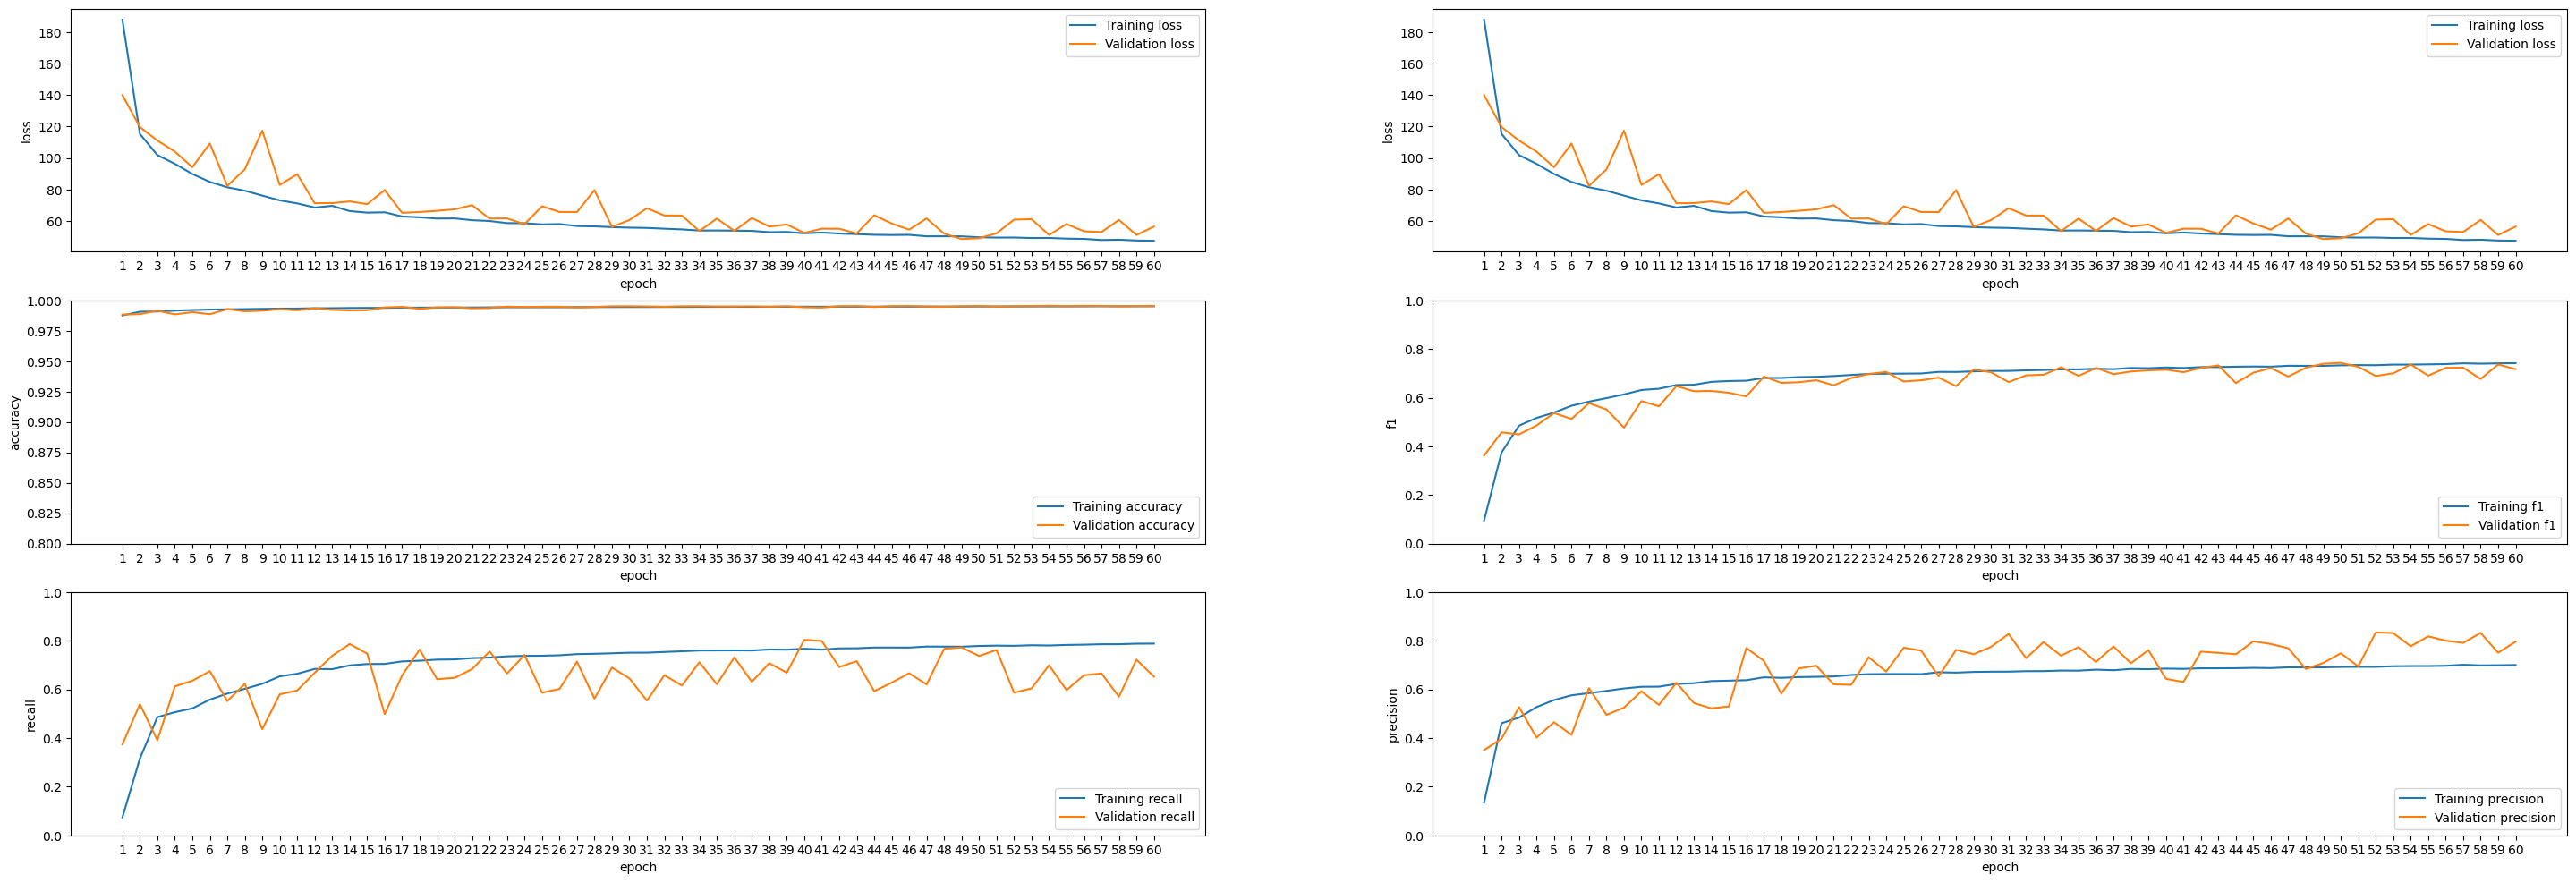

In [6]:
if Model.train_model:
    plot_losses = ["loss", "loss"]
    plot_metrics = ["accuracy", "f1", "recall", "precision"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training.svg")

    plots.plot_training_history(history=history.history, list_of_loss_names=plot_losses,
                                list_of_metric_names=plot_metrics,
                                save=Model.cfg["SAVE"], path=path)

1/1 [==============================] - 1s 542ms/step


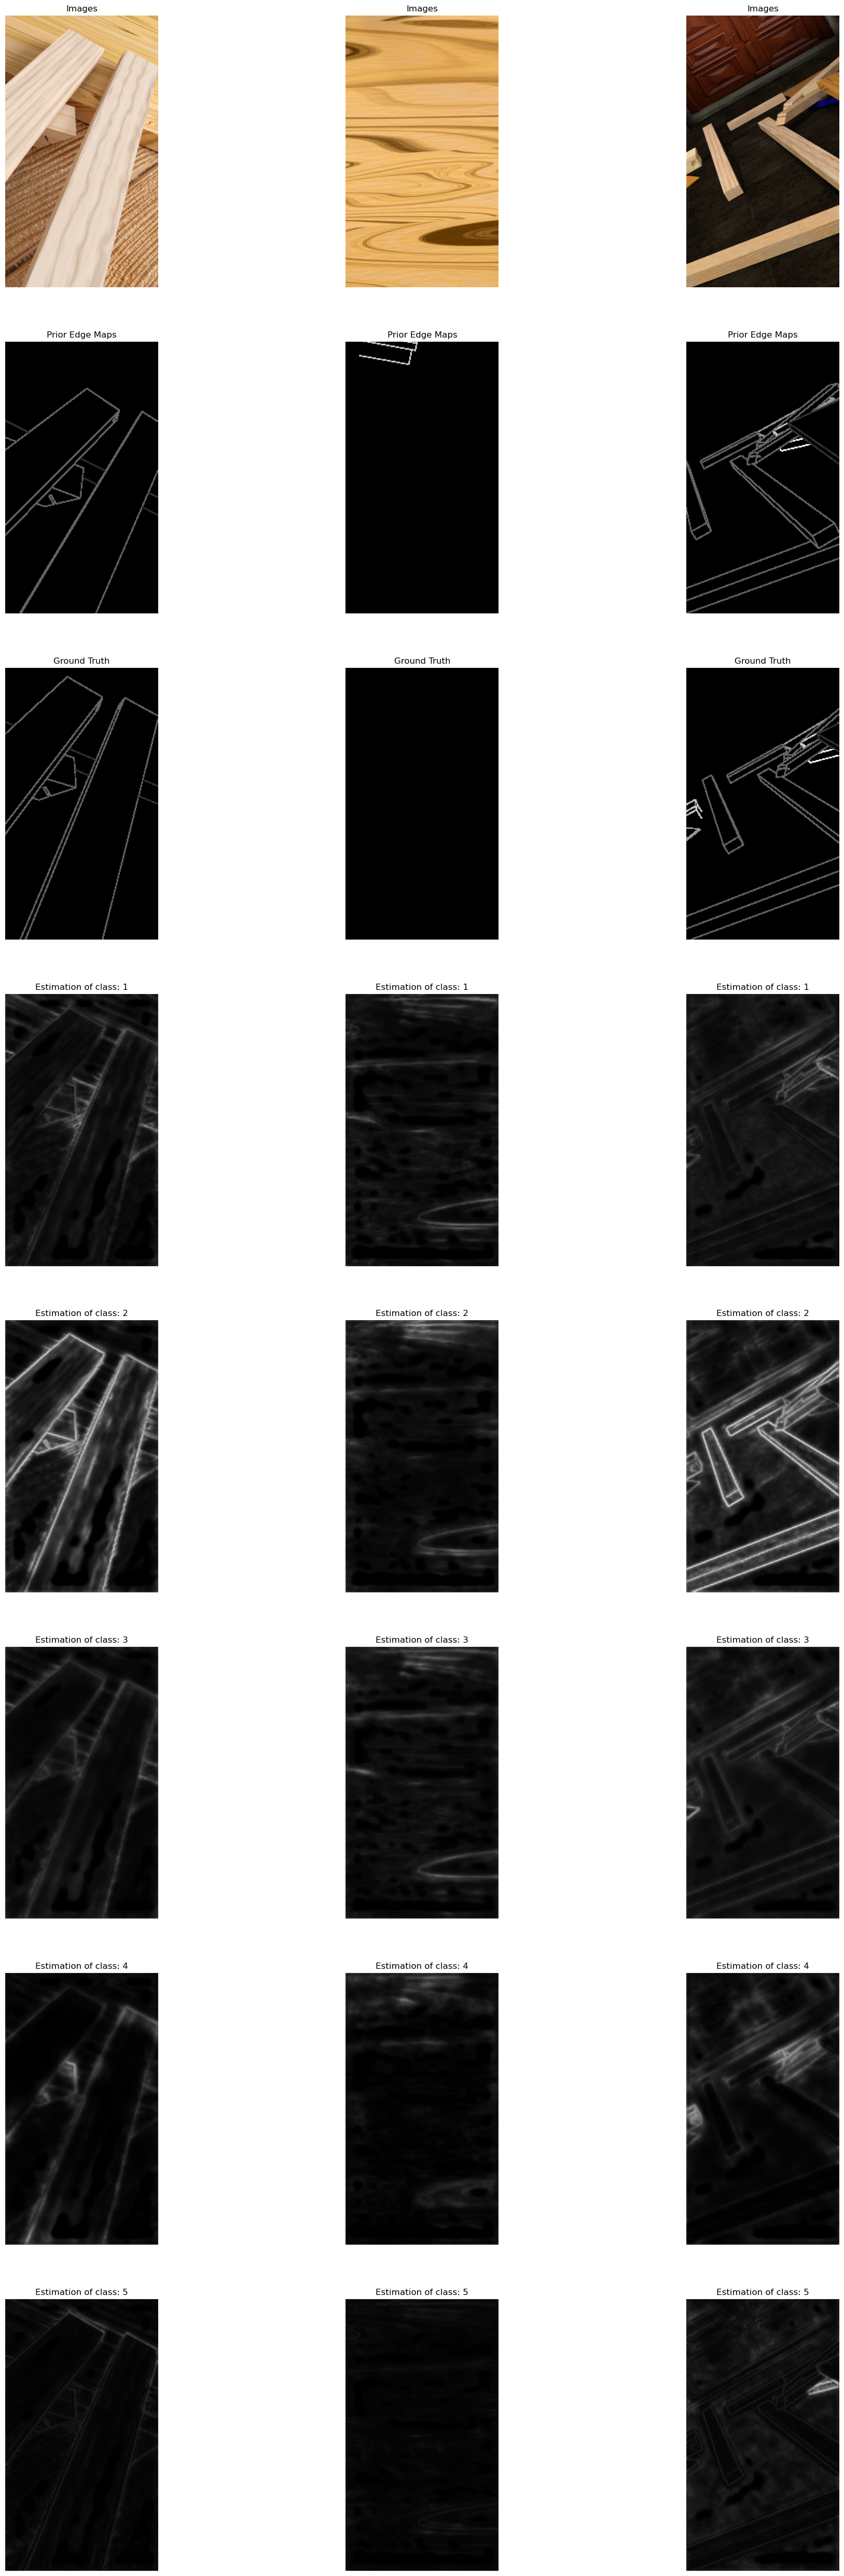

1/1 [==============================] - 0s 23ms/step


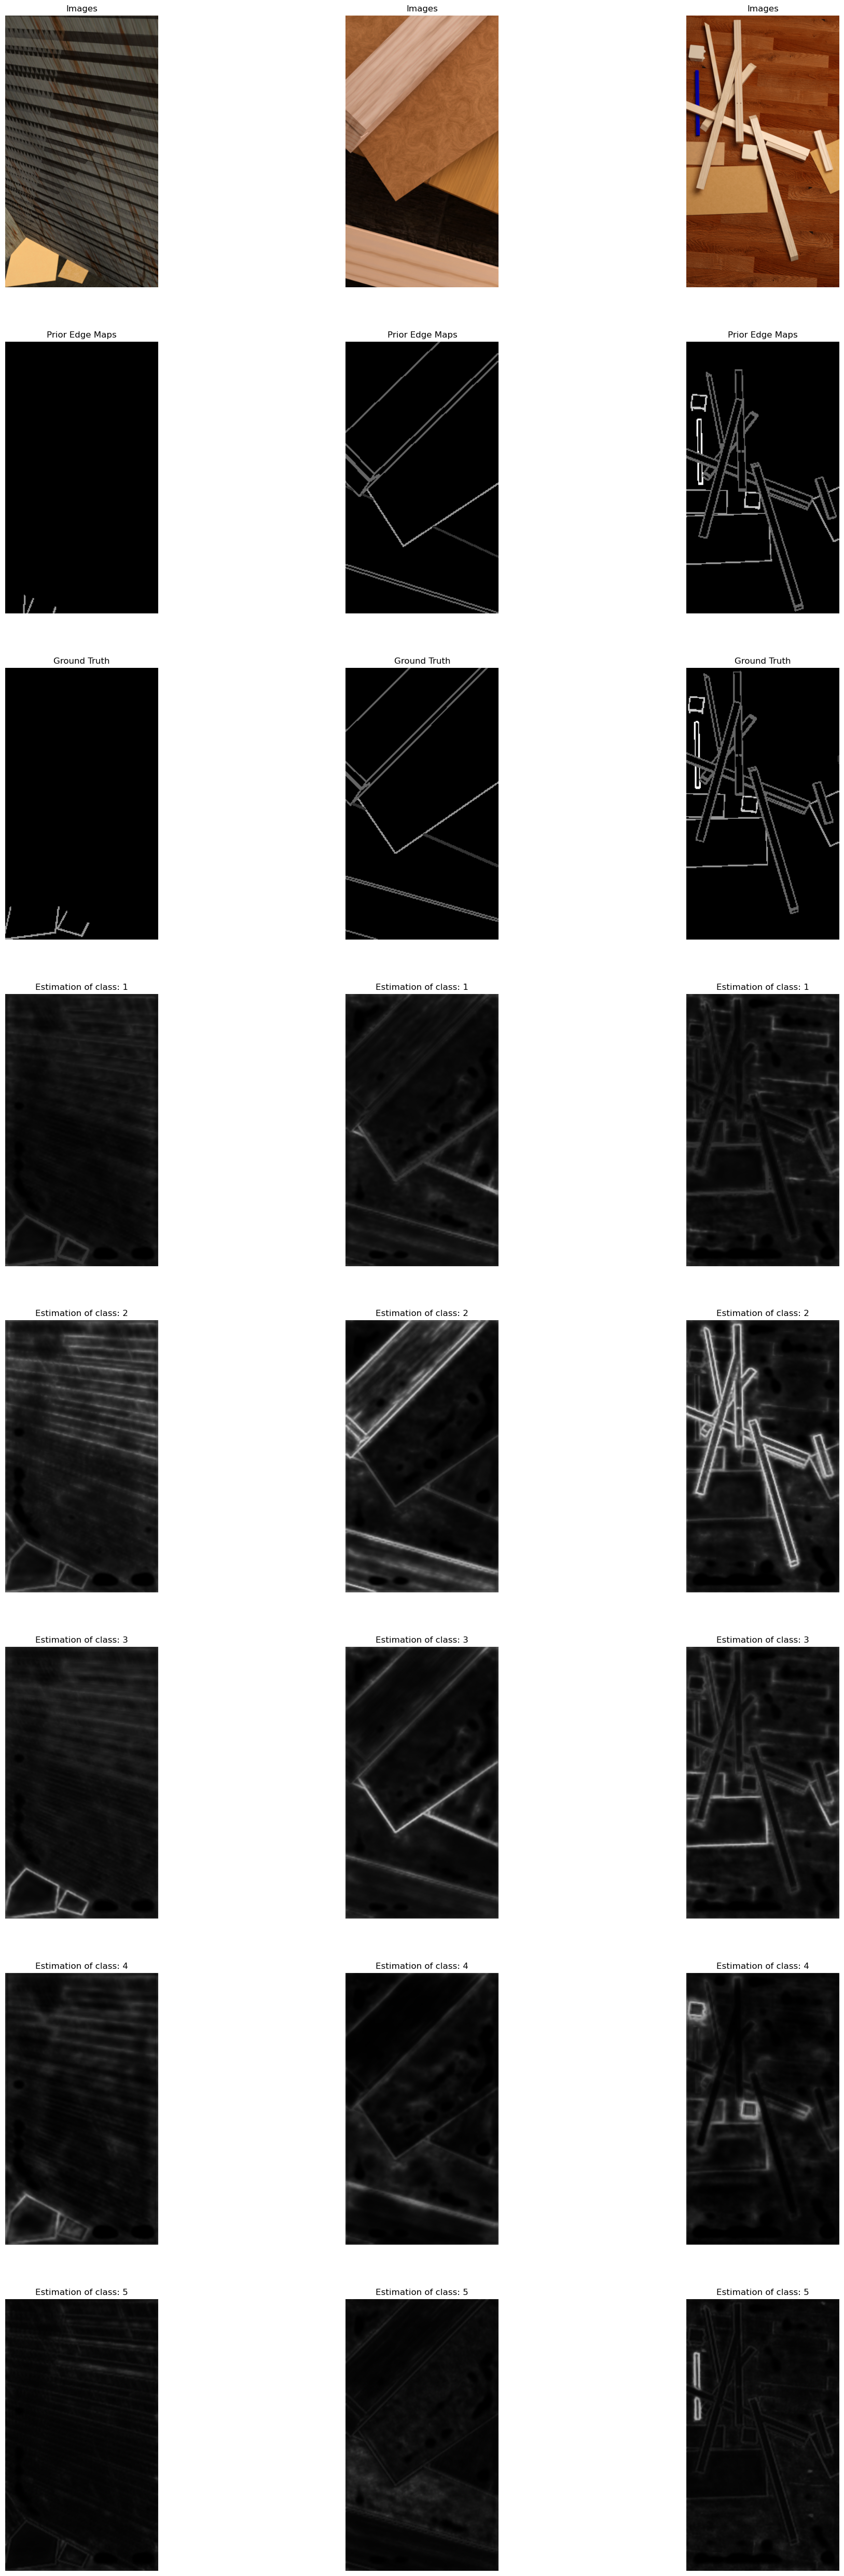

In [11]:
for inp, out in test_ds.take(2):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior = inp['in_edge'],
                                    labels=out['out_edge'],
                                    predictions=pred[0],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

1/1 [==============================] - 0s 60ms/step


2022-12-06 01:10:06.750187: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


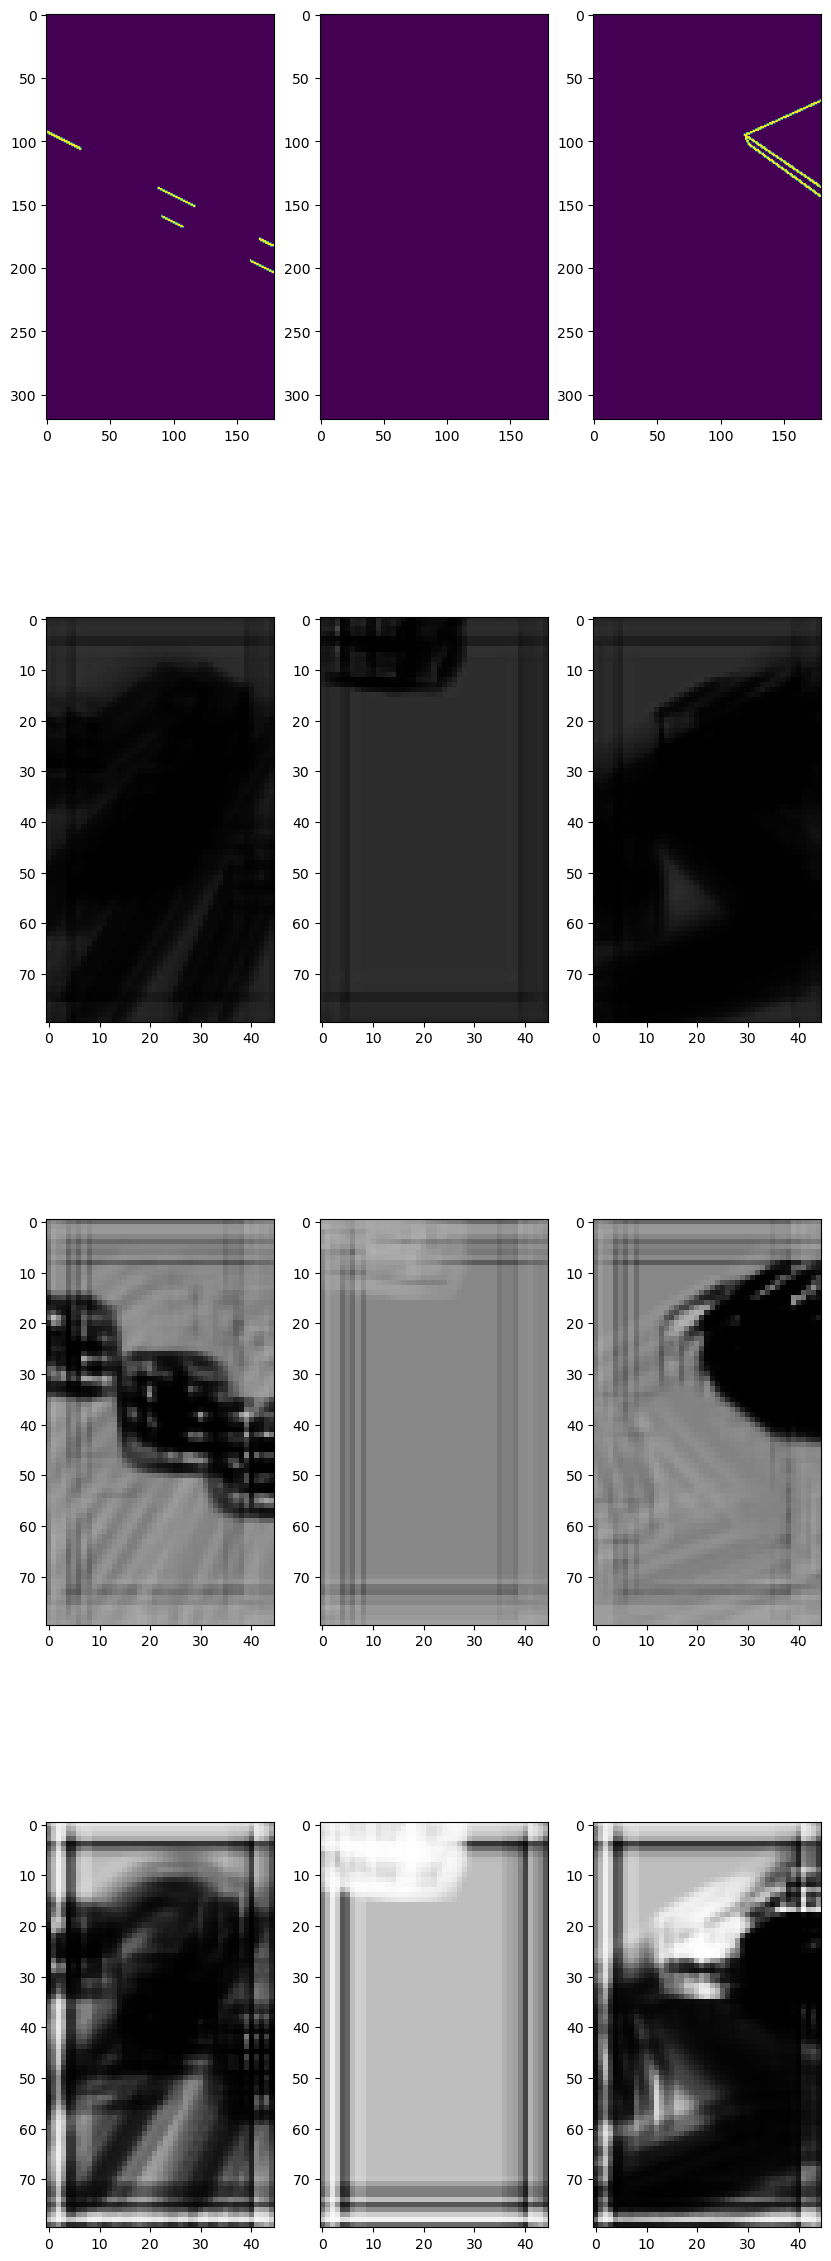

In [8]:
plt.figure(figsize=(10,30))

num = 3
batch = 3
for inp, out in test_ds.take(1):
    pred = model.predict(inp)
    out_pred = pred[1]
    for i in range(batch):
        plt.subplot(num+1, batch, i + 1)
        plt.imshow((inp["in_edge"][i,:,:,0]))
        for j in range(num):
            plt.subplot(num+1, batch, batch*(1+j) + i + 1)
            plt.imshow(out_pred[i,:,:,j], cmap='gray', vmin=0, vmax=1)
plt.show()

Max Accuracy Score = 0.995 at 0.500
MF1 = 0.714
MF1_1 = 0.625, ODS_1 = 0.400
MF1_2 = 0.759, ODS_2 = 0.500
MF1_3 = 0.716, ODS_3 = 0.400
MF1_4 = 0.556, ODS_4 = 0.500
MF1_5 = 0.778, ODS_5 = 0.500


[0.4, 0.5, 0.4, 0.5, 0.5]

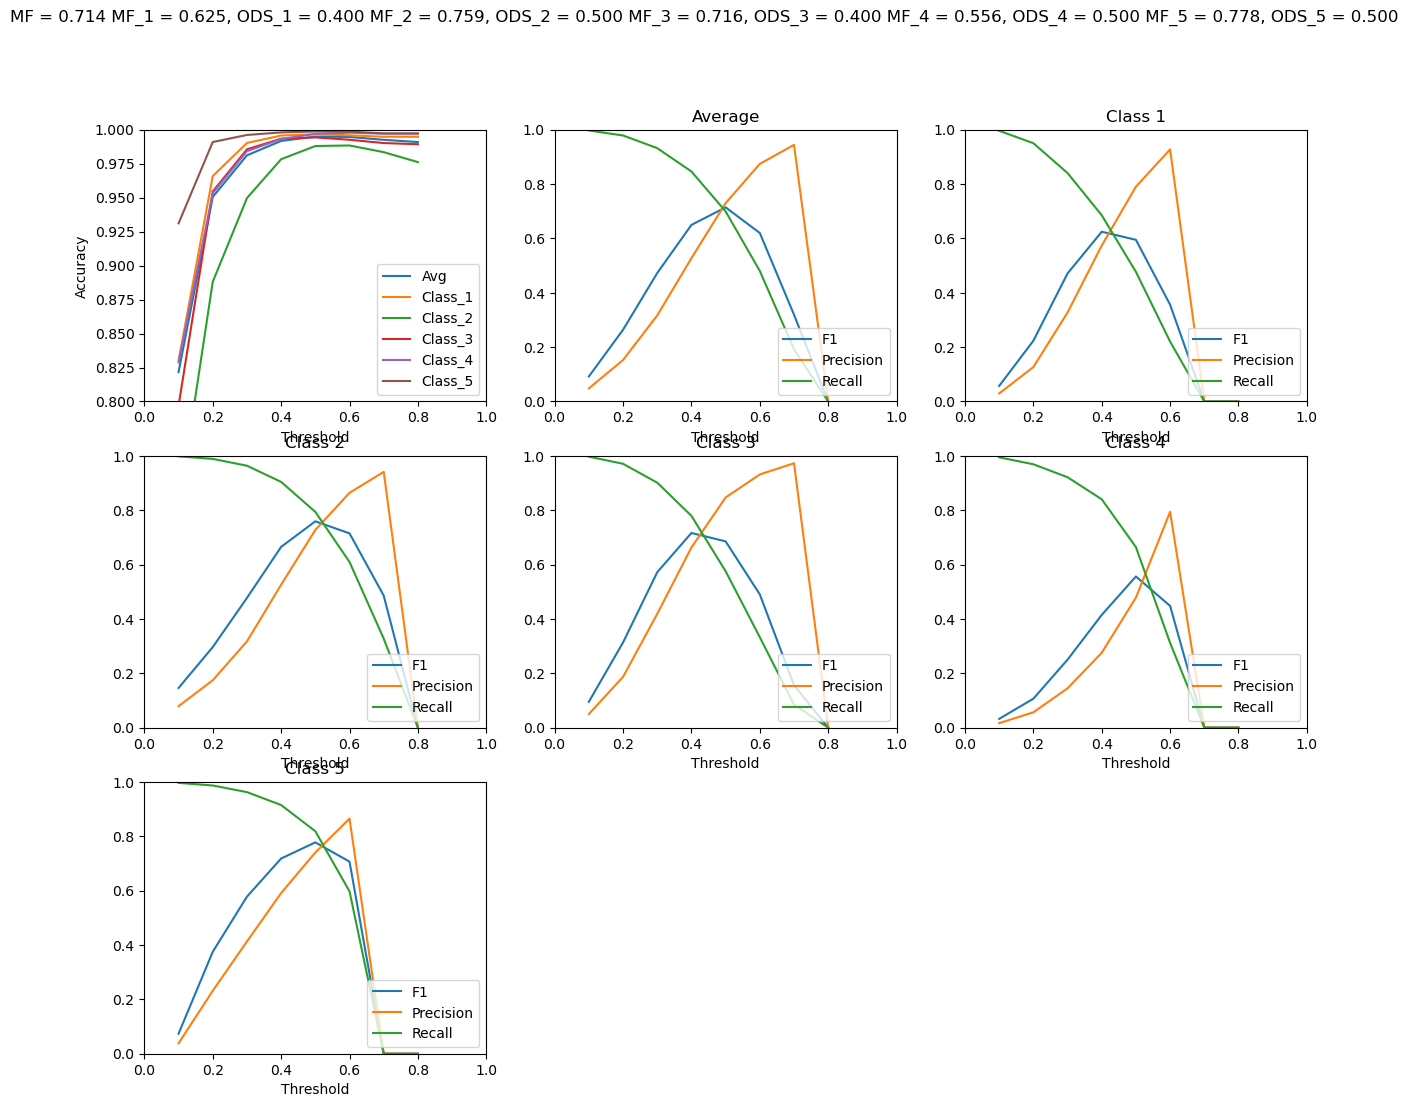

In [9]:
### Maximum F1 Score:
path_metrics_evaluation_plot = os.path.join(Model.Data.paths["FIGURES"],
                                            "threshold_metrics_evaluation_test_ds.svg")

edge_detection_plots.plot_threshold_metrics_evaluation(model=model, ds=test_ds,
                                                       num_classes=DataProcessing.num_classes['edge'],
                                                       classes_displayed_individually=True,
                                                       save=Model.cfg["SAVE"],
                                                       path=path_metrics_evaluation_plot,
                                                       accuracy_y_lim_min=0.8)


In [10]:
if Model.cfg["CONVERT_TO_TFLITE"]:
    Model.convert_model_to_tflite(model)

=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the DEQUANTIZE op takes
tensor #15 as input and produces tensor #168 as output.

Subgraph#0 main(T#0, T#1) -> [T#354, T#447]
  Op#0 DEQUANTIZE(T#15[]) -> [T#168]
  Op#1 DEQUANTIZE(T#16[]) -> [T#169]
  Op#2 DEQUANTIZE(T#17[]) -> [T#170]
  Op#3 DEQUANTIZE(T#18[]) -> [T#171]
  Op#4 DEQUANTIZE(T#19[]) -> [T#172]
  Op#5 DEQUANTIZE(T#20[]) -> [T#173]
  Op#6 DEQUANTIZE(T#21[]) -> [T#174]
  Op#7 DEQUANTIZE(T#22[]) -> [T#175]
  Op#8 DEQUANTIZE(T#23[]) -> [T#176]
  Op#9 DEQUANTIZE(T#24[]) -> [T#177]
  Op#10 DEQUANTIZE(T#25[]) -> [T#178]
  Op#11 DEQUANTIZE(T#26[]) -> [T#179]
  Op#12 DEQUANTIZE(T#27[]) -> [T#180]
  Op#13 DEQUANTIZE(T#28[]) -> [T#181]
  Op#14 DEQUANTIZE(T#29[]) -> [T#182]
  Op#15 DEQUANTIZE(T#30[]) -> [T#183]
  Op#16 DEQUANTIZE(T#31[]) -> [T#184]
  Op#17 DEQUANTIZE(T#32[]) -> [T#185]
  Op#18 DEQUANTIZE(T#33[]) -> [T#18

2022-12-06 01:10:35.575574: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-06 01:10:35.575599: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-06 01:10:35.576063: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/TFLITE
2022-12-06 01:10:35.604088: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-06 01:10:35.604117: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/TFLITE
2022-12-06 01:10:35.673355: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-12-06 01:10:35.703585: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-06 01:10:36